In [48]:
import cv2 , os , glob
import matplotlib.pyplot as plt
import numpy as np

### Some functions to help us out

In [49]:
# Print the number of keypoints and descriptors for the image
def print_kp_des(img, kp, des,img_file):
    print(f"Number of keypoints and descriptors for {os.path.basename(img_file)}.jpg:", len(kp), len(des))
    
    #open the original image
    original_img = cv2.imread(img_file)
    #resize the image
    original_img = cv2.resize(original_img, (0, 0) , fx=0.5, fy=0.5)
    
    # Draw keypoints on the image
    img_kp = cv2.drawKeypoints(original_img, kp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    # Display the image, keypoints, and descriptors using matplotlib
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 5))
    ax0.imshow(original_img)
    ax0.set_title(f"Original image {os.path.basename(img_file)}")
    ax1.imshow(img)
    ax1.set_title(f"PreProcessed image {os.path.basename(img_file)}")
    ax1.axis('off')
    ax2.imshow(img_kp)
    ax2.set_title(f"Keypoints and descriptors for {os.path.basename(img_file)}")
    ax2.axis('off')
    plt.show()

# ignore the image L4.jpg and L9.jpg
def ingore(img_file):
 if os.path.basename(img_file) == "L4.jpg" or os.path.basename(img_file) == "L9.jpg":
    return True

# This function will plot the histogram of the descriptors
def plot_the_bar(descriptors):
    # Plot histogram of normalized descriptors
    fig, axs = plt.subplots(1, descriptors.shape[1], figsize=(20, 5))
    for i in range(descriptors.shape[1]):
        axs[i].hist(descriptors[:, i], bins=50)
        axs[i].set_title(f'Descriptor {i}')
plt.show()


## Preprocess The images

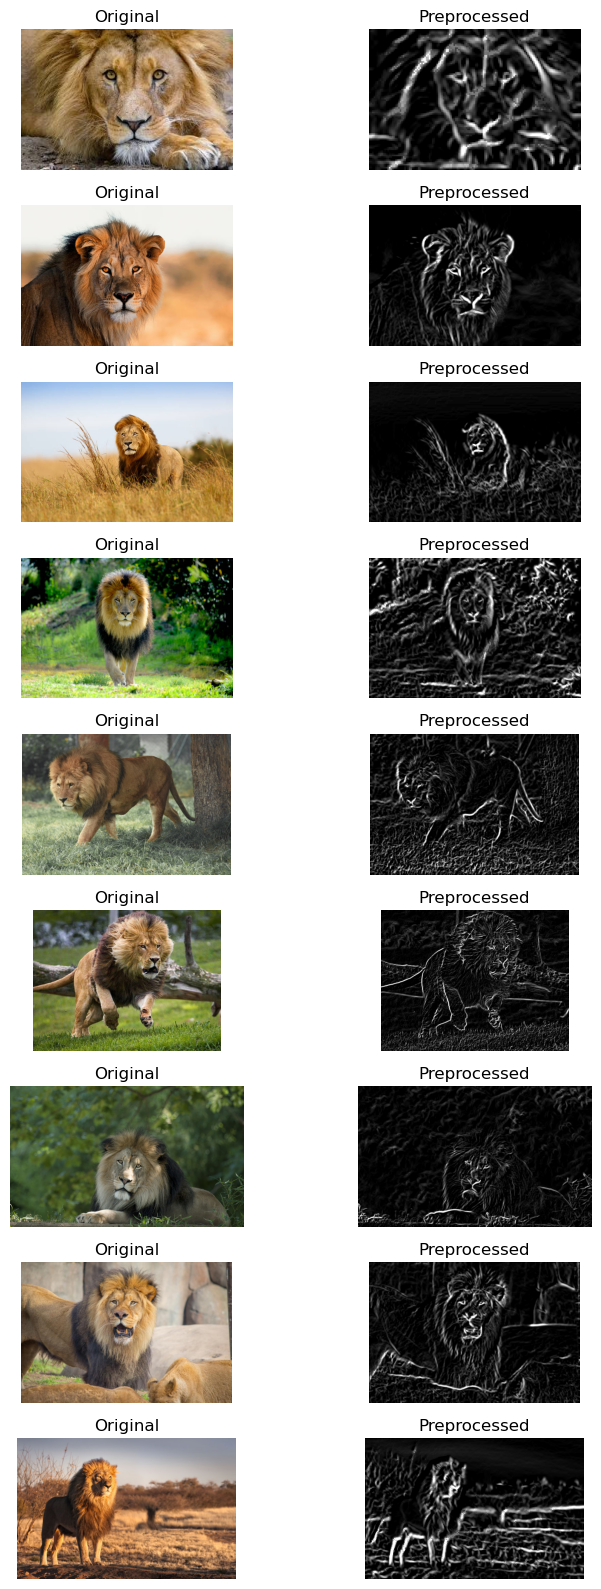

In [50]:
# Create an empty list to store the preprocessed images
preprocessed_imgs = []

# Get the list of all image files in the directory
img_files = glob.glob("./Data/*.jpg")

# Create a figure to display the images
fig, axs = plt.subplots(len(img_files), 2, figsize=(8, 16))

# Loop through every image file, preprocess it, and save it in the list
for i, img_file in enumerate(img_files):
    # Load the image
    img = cv2.imread(img_file)

    # Resize the image
    img_resized = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # Normalize the image
    gray_norm = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)

    # Apply Gaussian blur
    gray_blur = cv2.GaussianBlur(gray_norm, (5, 5), 0)

    # Apply Sobel filter along x and y axes
    sobel_x = cv2.Sobel(gray_blur, cv2.CV_8U, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_blur, cv2.CV_8U, 0, 1, ksize=3)

    # Combine results using bitwise OR
    gray_sobel = cv2.bitwise_or(sobel_x, sobel_y)

    # Save the preprocessed image in the list
    preprocessed_imgs.append(gray_sobel)

    # Display the original and preprocessed image
    axs[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title("Original")

    axs[i, 1].imshow(gray_sobel, cmap="gray")
    axs[i, 1].set_title("Preprocessed")

    axs[i, 0].axis("off")
    axs[i, 1].axis("off")

# Display the plot
plt.tight_layout()
plt.show()


### Using SIFT to extract features from images

Number of keypoints and descriptors for L1.jpg.jpg: 263 263


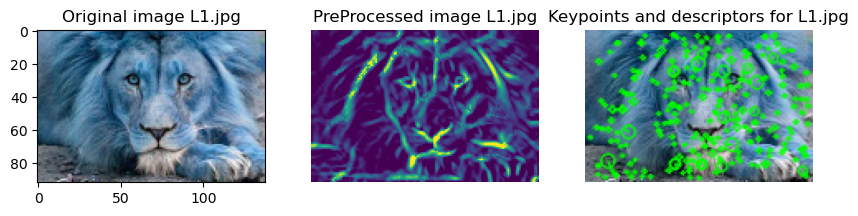

Number of keypoints and descriptors for L2.jpg.jpg: 577 577


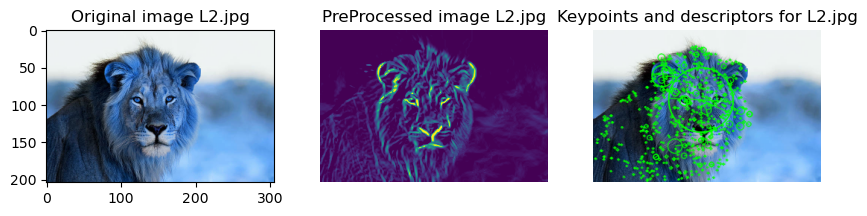

Number of keypoints and descriptors for L3.jpg.jpg: 837 837


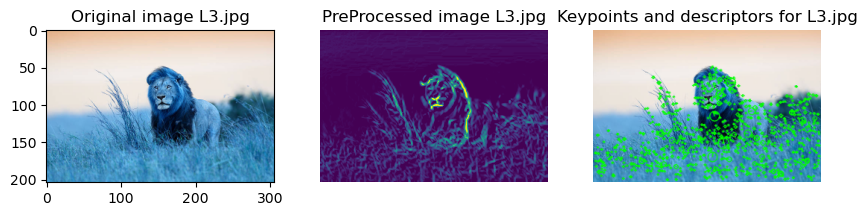

Number of keypoints and descriptors for L5.jpg.jpg: 3572 3572


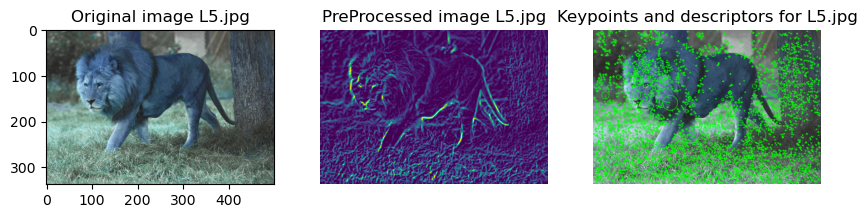

Number of keypoints and descriptors for L6.jpg.jpg: 7531 7531


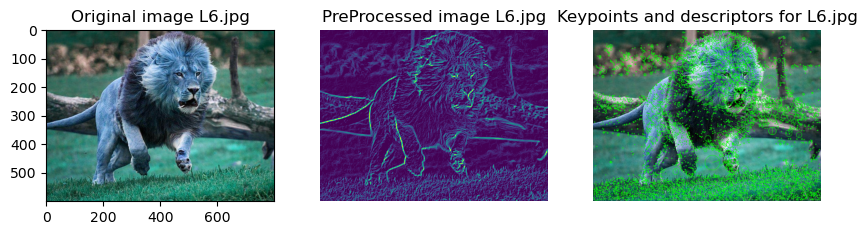

Number of keypoints and descriptors for L7.jpg.jpg: 1910 1910


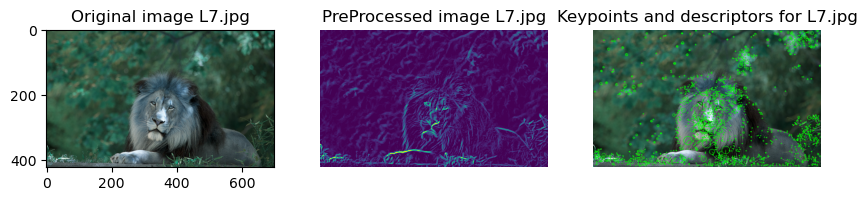

Number of keypoints and descriptors for L8.jpg.jpg: 1649 1649


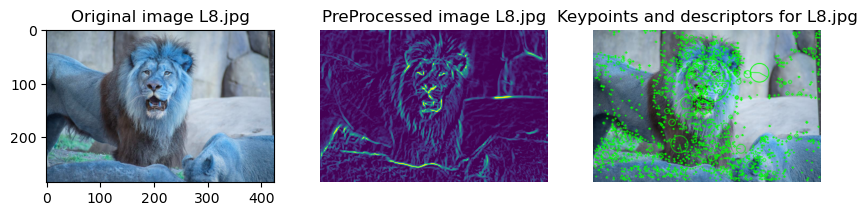

In [51]:
# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Create empty lists for keypoints and descriptors
sift_keypoints = []
sift_descriptors = []

# Loop through every preprocessed image and extract SIFT features
for i, img in enumerate(preprocessed_imgs):
    # Get the file name of the image
    filename = img_files[i].split("/")[-1]
    if ingore(filename):
        continue
    # Extract SIFT features
    kp, des = sift.detectAndCompute(img, None)
    
    # Append keypoints and descriptors to lists
    sift_keypoints.append(kp)
    sift_descriptors.append(des)

    print_kp_des(img, kp, des, filename)

In [52]:
# Convert keypoints and descriptors to numpy arrays
sift_keypoints = np.concatenate(sift_keypoints, axis=0)
sift_descriptors = np.concatenate(sift_descriptors, axis=0)

# Normalize the descriptors
sift_descriptors -= sift_descriptors.mean(axis=0)
sift_descriptors /= sift_descriptors.std(axis=0)


The SIFT descriptors matrix has 16339 descriptors, each with 128 dimensions.


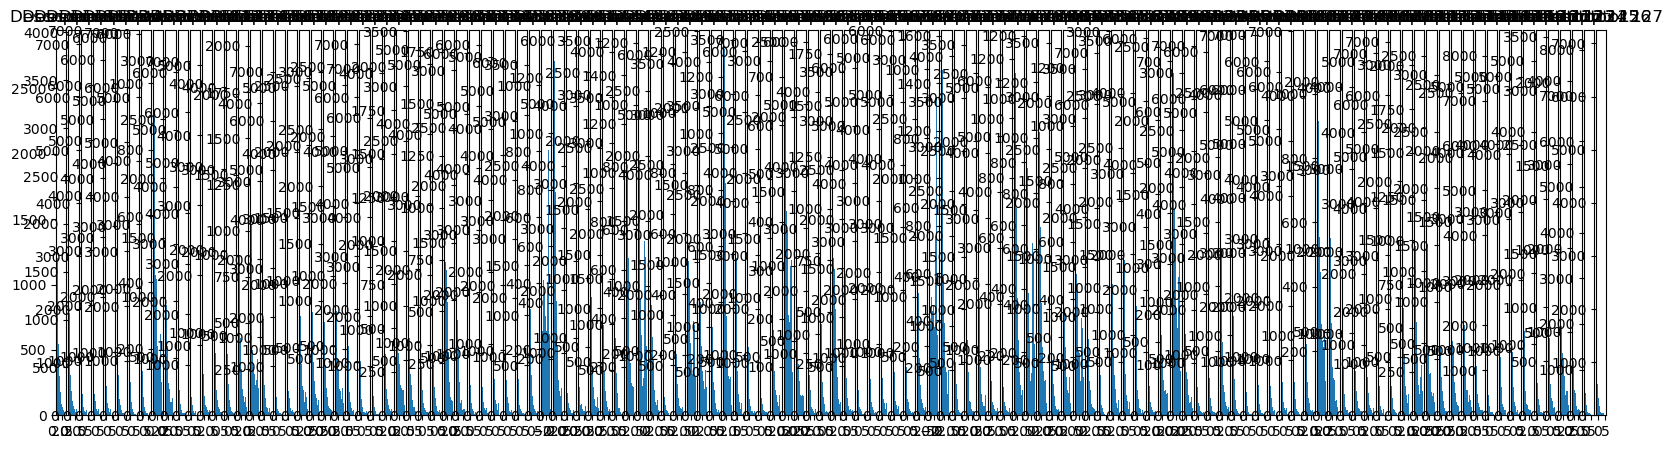

In [53]:
num_descriptors, descriptor_dim = sift_descriptors.shape
print(f"The SIFT descriptors matrix has {num_descriptors} descriptors, each with {descriptor_dim} dimensions.")
# Plot histogram of normalized descriptors
plot_the_bar(sift_descriptors)

### Using ORB to extract features from images

Number of keypoints and descriptors for L1.jpg.jpg: 125 125


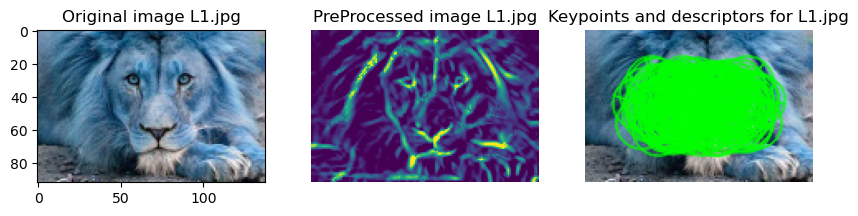

Number of keypoints and descriptors for L2.jpg.jpg: 437 437


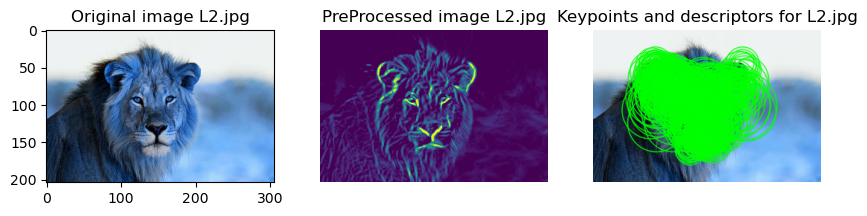

Number of keypoints and descriptors for L3.jpg.jpg: 437 437


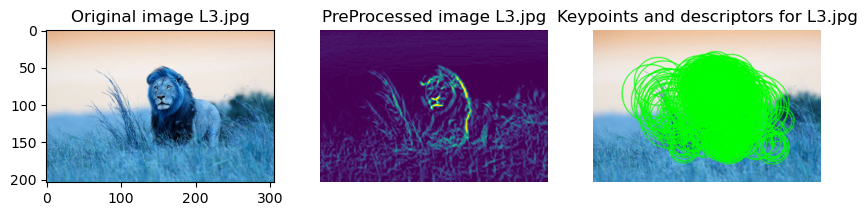

Number of keypoints and descriptors for L5.jpg.jpg: 500 500


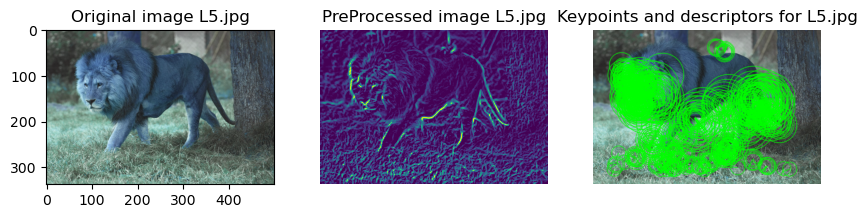

Number of keypoints and descriptors for L6.jpg.jpg: 500 500


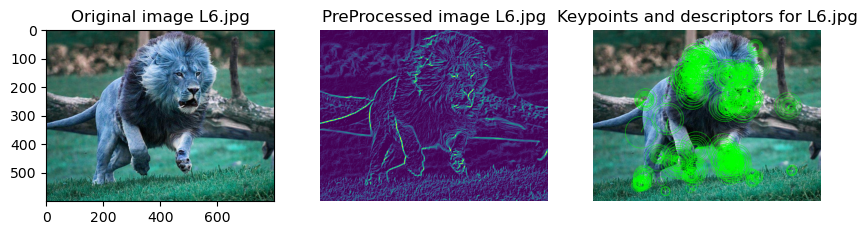

Number of keypoints and descriptors for L7.jpg.jpg: 500 500


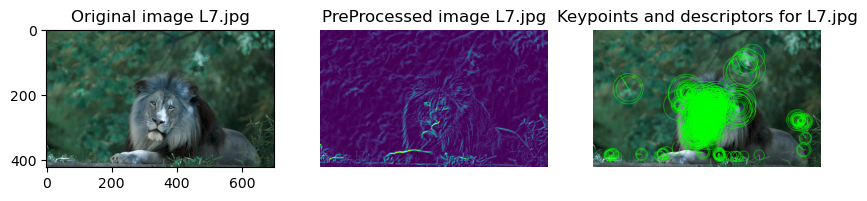

Number of keypoints and descriptors for L8.jpg.jpg: 494 494


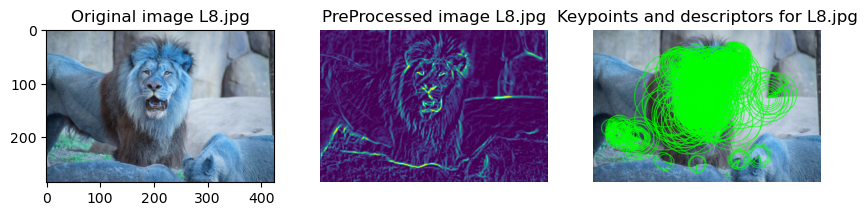

In [54]:
# Initialize the ORB detector
orb = cv2.ORB_create()


# Create empty lists for keypoints and descriptors
orb_keypoints = []
orb_descriptors = []


# Loop through every preprocessed image and extract ORB features
for i, img in enumerate(preprocessed_imgs):
    # Get the file name of the image
    filename = img_files[i].split("/")[-1]
    if ingore(filename):
        continue
    # Extract ORB features
    kp, des = orb.detectAndCompute(img, None)
    
    # Append keypoints and descriptors to lists
    orb_keypoints.append(kp)
    orb_descriptors.append(des)

    print_kp_des(img, kp, des, filename)


In [55]:
# Convert keypoints and descriptors to numpy arrays
orb_keypoints = np.concatenate(orb_keypoints, axis=0)
orb_descriptors = np.concatenate(orb_descriptors, axis=0)

# Normalize the descriptors
orb_descriptors = orb_descriptors.astype('float32')
orb_descriptors -= orb_descriptors.mean(axis=0)
orb_descriptors /= orb_descriptors.std(axis=0)

The ORB descriptors matrix has 2993 descriptors, each with 32 dimensions.


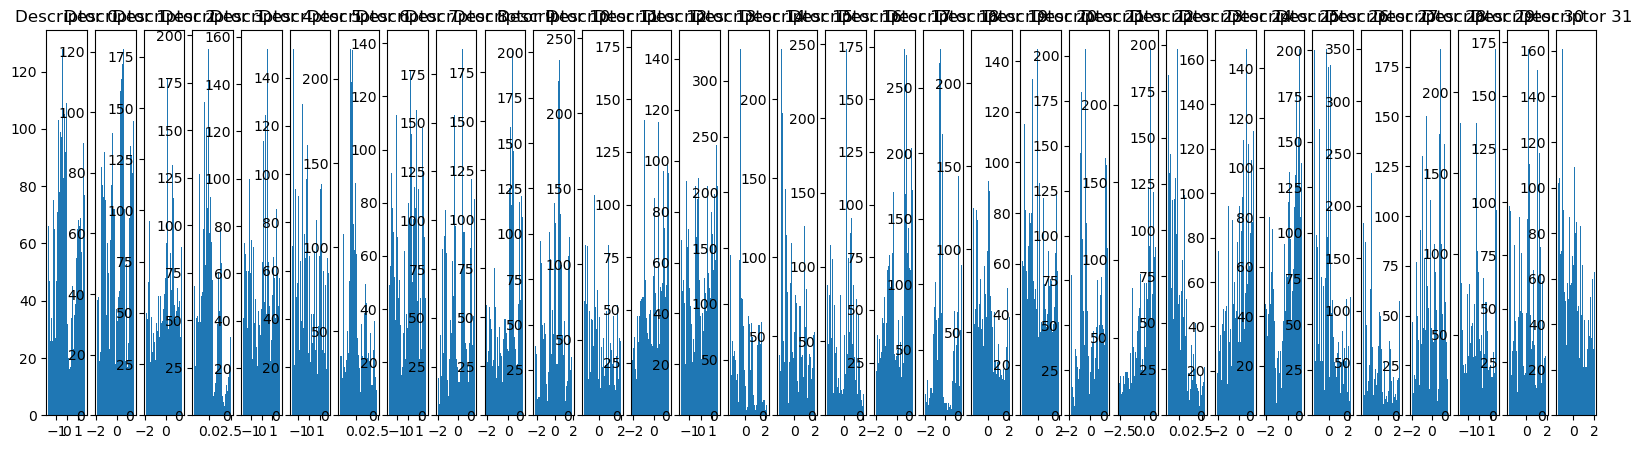

In [56]:
num_descriptors, descriptor_dim = orb_descriptors.shape
print(f"The ORB descriptors matrix has {num_descriptors} descriptors, each with {descriptor_dim} dimensions.")
plot_the_bar(orb_descriptors)